# Set up your environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import sklearn
print('Done')

Done


In [2]:
url = './datasets/africa_food_prices.csv'
df = pd.read_csv(url)

In [3]:
df.columns

Index(['Unnamed: 0', 'country_id', 'country', 'state_id', 'state', 'market_id',
       'market', 'produce_id', 'produce', 'currency_id', 'currency', 'pt_id',
       'market_type', 'um_unit_id', 'quantity', 'month', 'year', 'price',
       'mp_commoditysource'],
      dtype='object')

# Removing all white spaces before and after a string

In [4]:
df.columns.str.strip()

Index(['Unnamed: 0', 'country_id', 'country', 'state_id', 'state', 'market_id',
       'market', 'produce_id', 'produce', 'currency_id', 'currency', 'pt_id',
       'market_type', 'um_unit_id', 'quantity', 'month', 'year', 'price',
       'mp_commoditysource'],
      dtype='object')

# Deleting columns we dont need

In [5]:
allCols = ['Unnamed: 0', 'country_id', 'country', 'state_id', 'state', 'market_id',
       'market', 'produce_id', 'produce', 'currency_id', 'currency', 'pt_id',
       'market_type', 'um_unit_id', 'quantity', 'month', 'year', 'price',
       'mp_commoditysource']
dropCols = ['Unnamed: 0', 'country_id', 'market_id', 'state_id', 'produce_id', 'currency_id', 'pt_id', 'um_unit_id', 'mp_commoditysource']

In [6]:
df = df.drop(columns = dropCols)

# Removing Nan Values

In [7]:
# Checking if there is..............
df.isna().sum()

country             0
state          126678
market              0
produce             0
currency            0
market_type         0
quantity            0
month               0
year                0
price               0
dtype: int64

In [8]:
# So dropna()
df.dropna()

,country,state,market,produce,currency,market_type,quantity,month,year,price
0,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,KG,4,2015,90.0000
1,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,KG,5,2015,96.0000
2,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,KG,6,2015,96.0000
3,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,KG,7,2015,83.0000
4,Algeria,Alger,Algiers,Rice - Retail,DZD,Retail,KG,8,2015,80.0000
...,...,...,...,...,...,...,...,...,...,...
956774,Zimbabwe,Midlands,Mbilashaba,Beans (sugar) - Retail,ZWL,Retail,KG,6,2021,233.3333
956775,Zimbabwe,Midlands,Mbilashaba,Toothpaste - Retail,ZWL,Retail,100 ML,6,2021,112.5000
956776,Zimbabwe,Midlands,Mbilashaba,Laundry soap - Retail,ZWL,Retail,KG,6,2021,114.0000
956777,Zimbabwe,Midlands,Mbilashaba,Handwash soap - Retail,ZWL,Retail,250 G,6,2021,59.5000


In [9]:
# Now Checking...........
df.isnull().sum()

country             0
state          126678
market              0
produce             0
currency            0
market_type         0
quantity            0
month               0
year                0
price               0
dtype: int64

# Pivot Tables

Aggregate your data using pivot tables

A Pivot table for the minimum prices for the year in all 4 part of Africa i.e South, West, North, East.

Data Grouping

In [10]:
pivot_table = pd.pivot_table(df, index=['country', 'year', 'month','market'], values = ['price'], aggfunc='mean')

# Table Query

The Four Rigion Part Of Africa

In [11]:
southern_part = pivot_table.query("country == ['Zimbabwe', 'Zambia','Angola', 'Botswana', 'Lesotho','Mozambique', 'Namibia','South Africa','Swaziland']")

northern_part = pivot_table.query("country == ['Algeria','Egypt',' Libya','Morocco','Sudan','Tunisia','Western Sahara']")

western_part = pivot_table.query("country == ['Benin','Cape Verde','Gambia','Ghana','Guinea','Guinea-Bissau','Liberia','Mali','Mauritania','Niger','Nigeria','Senegal','Sierra Leone','Togo']")

eastern_part = pivot_table.query("country == ['Uganda','Kenya']")

central_part = pivot_table.query("country == ['cameroon','Central African Republic','Chad','Congo','Gabon']")

In [12]:
#Convert to dataframe

southernPartResetIndex = southern_part.reset_index()

northernPartResetIndex = northern_part.reset_index()

westernPartResetIndex = western_part.reset_index()

easternPartResetIndex = eastern_part.reset_index()

centralPartResetIndex = central_part.reset_index()

In [13]:
southernPartResetIndex['country'].unique()

array(['Angola', 'Lesotho', 'Mozambique', 'Namibia', 'South Africa',
       'Swaziland', 'Zambia', 'Zimbabwe'], dtype=object)

# The Minimum Prices Of Commodities In The Southern Part Of Africa

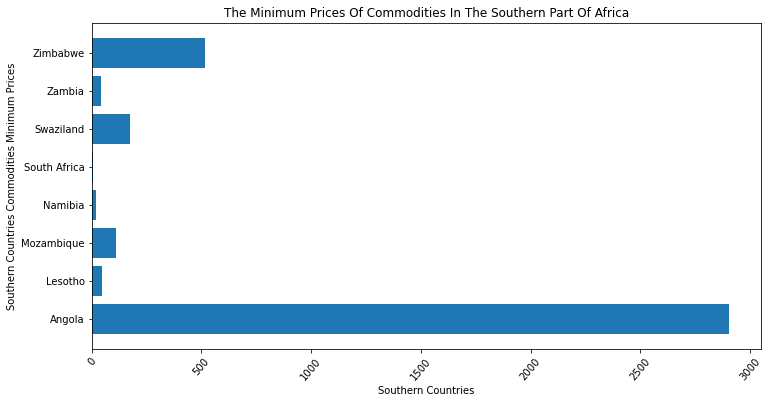

In [14]:
southX = southernPartResetIndex.country

southY = southernPartResetIndex.price

plt.figure(figsize=(12,6))
plt.barh(southX,southY)
plt.title("The Minimum Prices Of Commodities In The Southern Part Of Africa")
plt.xlabel("Southern Countries")
plt.ylabel("Southern Countries Commodities Minimum Prices")
plt.xticks(rotation=50)
plt.show()

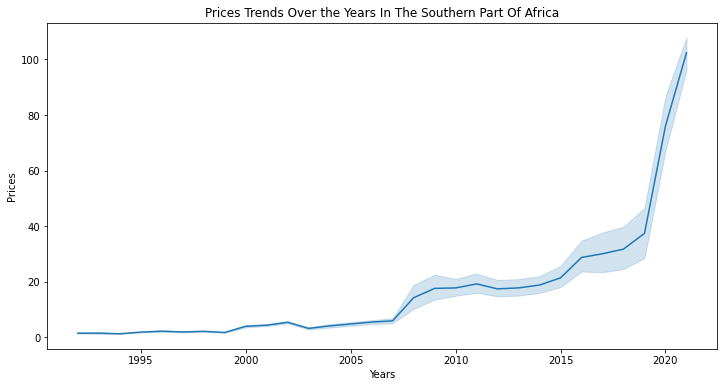

In [15]:
southdataset = southernPartResetIndex
plt.figure(figsize=(12,6))
plt.title("Prices Trends Over the Years In The Southern Part Of Africa")
sns.lineplot(x="year", y="price",data=southdataset)
plt.xlabel("Years")
plt.ylabel("Prices")
plt.show()

# The Minimum Prices Of Commodities In The Northern Part Of Africa

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

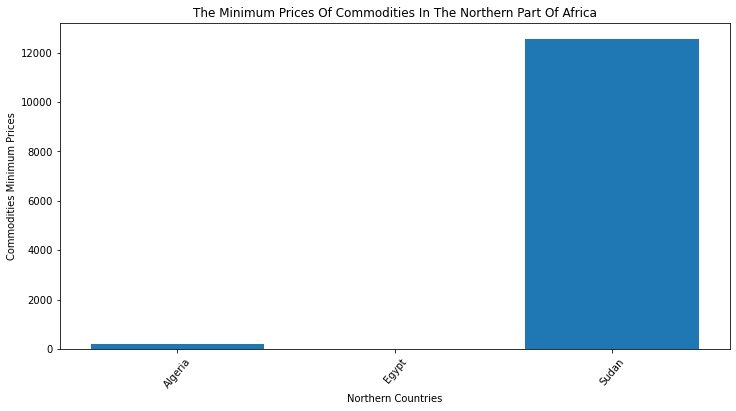

In [16]:
northX = northernPartResetIndex.country
northY = northernPartResetIndex.price

plt.figure(figsize=(12,6))
plt.bar(northX,northY)
plt.title("The Minimum Prices Of Commodities In The Northern Part Of Africa")
plt.xlabel("Northern Countries")
plt.ylabel("Commodities Minimum Prices")
plt.xticks(rotation=50)

Text(0, 0.5, 'Prices')

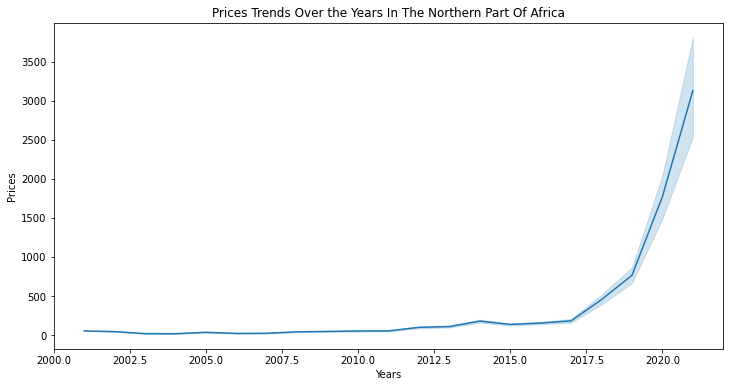

In [17]:
northdataset = northernPartResetIndex
plt.figure(figsize=(12,6))
plt.title("Prices Trends Over the Years In The Northern Part Of Africa")
sns.lineplot(x="year", y="price",data=northdataset)
plt.xlabel("Years")
plt.ylabel("Prices")

# The Minimum Prices Of Commodities In The Western Part Of Africa

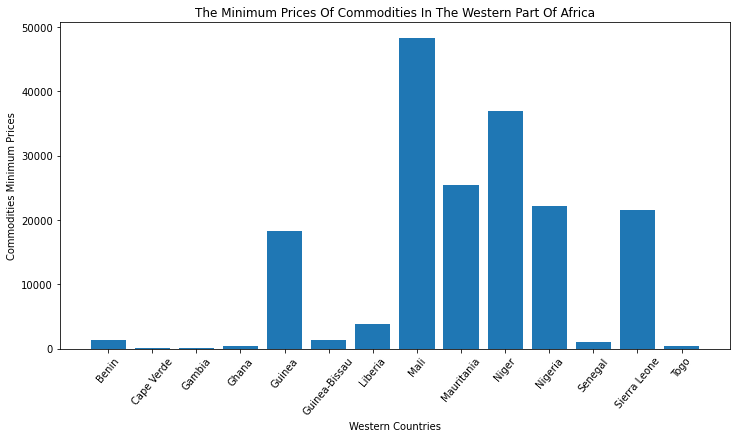

In [18]:
westX = westernPartResetIndex.country
westY = westernPartResetIndex.price

plt.figure(figsize=(12,6))
plt.bar(westX,westY)
plt.title("The Minimum Prices Of Commodities In The Western Part Of Africa")
plt.xlabel("Western Countries")
plt.ylabel("Commodities Minimum Prices")
plt.xticks(rotation=50)
plt.show()

Text(0, 0.5, 'Prices')

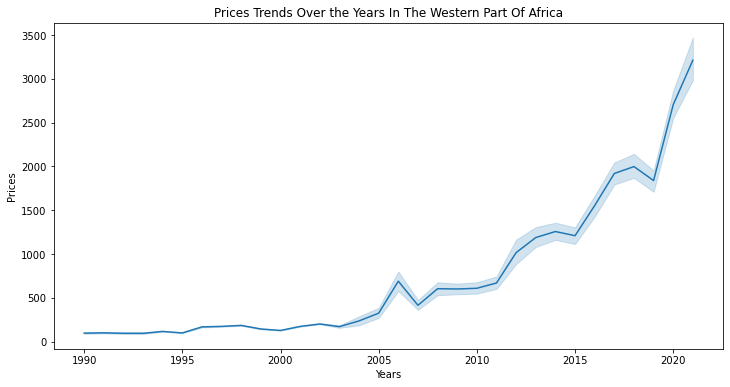

In [19]:
westdataset = westernPartResetIndex
plt.figure(figsize=(12,6))
plt.title("Prices Trends Over the Years In The Western Part Of Africa")
sns.lineplot(x="year", y="price",data=westdataset)
plt.xlabel("Years")
plt.ylabel("Prices")

# The Minimum Prices Of Commodities In The Eastern Part Of Africa

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

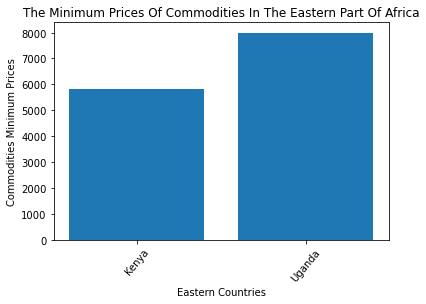

In [20]:
eastXaxis = easternPartResetIndex.country
eastYaxis = easternPartResetIndex.price

plt.bar(eastXaxis,eastYaxis)
plt.title("The Minimum Prices Of Commodities In The Eastern Part Of Africa")
plt.xlabel("Eastern Countries")
plt.ylabel("Commodities Minimum Prices")
plt.xticks(rotation=50)

Text(0, 0.5, 'Prices')

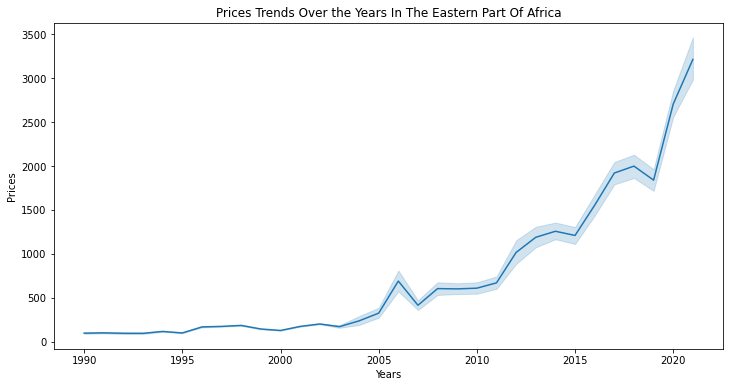

In [21]:
eastdataset = westernPartResetIndex
plt.figure(figsize=(12,6))
plt.title("Prices Trends Over the Years In The Eastern Part Of Africa")
sns.lineplot(x="year", y="price",data=eastdataset)
plt.xlabel("Years")
plt.ylabel("Prices")

# The Minimum Prices Of Commodities In The Central Part Of Africa

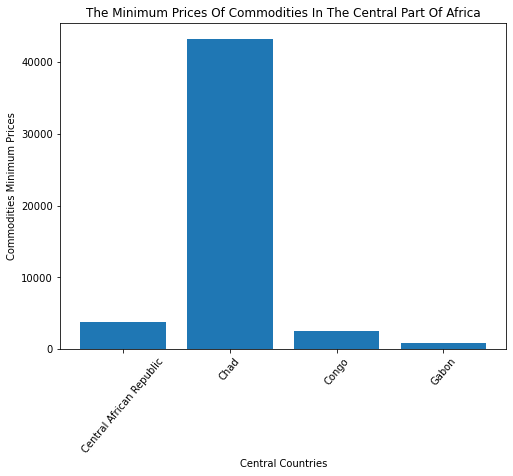

In [22]:
x = centralPartResetIndex.country
y = centralPartResetIndex.price

plt.figure(figsize=(8,6))
plt.bar(x,y)
plt.title("The Minimum Prices Of Commodities In The Central Part Of Africa")
plt.xlabel("Central Countries")
plt.ylabel("Commodities Minimum Prices")
plt.xticks(rotation=50)
plt.show()

Text(0, 0.5, 'Prices')

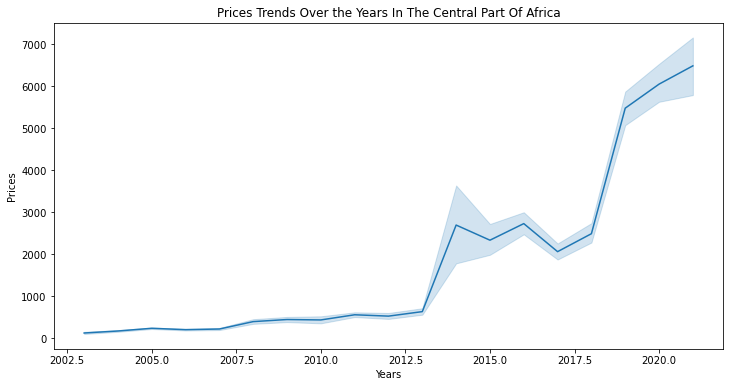

In [23]:
centraldataset = centralPartResetIndex
plt.figure(figsize=(12,6))
plt.title("Prices Trends Over the Years In The Central Part Of Africa")
sns.lineplot(x="year", y="price",data=centraldataset)
plt.xlabel("Years")
plt.ylabel("Prices")